## Explore weather trends.

### 1. Read data from database using SQL.

```
-- nearest city data
select year,avg_temp from city_data where city = 'Moscow'

-- global data
select * from global_data
```

### 2. Read data from csv file.

In [38]:
import csv
def read_csv(filename):
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        years = []
        temps = []
        first_lane = False
        for row in readCSV:
            if(not first_lane):
                first_lane = True
                continue
            year = row[0]
            temp = float(row[1]) if (row[1] != '') else 0.0;

            years.append(year)
            temps.append(temp)
    return years, temps

In [39]:
years_city, temps_city = read_csv('city_data.csv')
years_global, temps_global = read_csv('global_data.csv')

### 3. Calculate moving averages.

In [40]:
def moving_avg (array, num_avg):
    m_avg = []
    if(len(array) > num_avg):
        for i in range(num_avg, len(array)):
            m_avg.append(sum(array[i-num_avg:i])/num_avg)
    return m_avg

moving_avg_temps_city = moving_avg(temps_city, 7)
moving_avg_temps_global = moving_avg(temps_global, 7)

years_city = years_city[7:]
years_global = years_global[7:]
labels_years_global = years_global.copy()
labels_years_city = years_city.copy()

In [42]:
for i in range(len(years_city)):
    if(i % 7 != 0):
        years_city[i] = ''
for i in range(len(years_global)):
    if(i % 7 != 0):
        years_global[i] = ''

### 4. Plot moving averages.

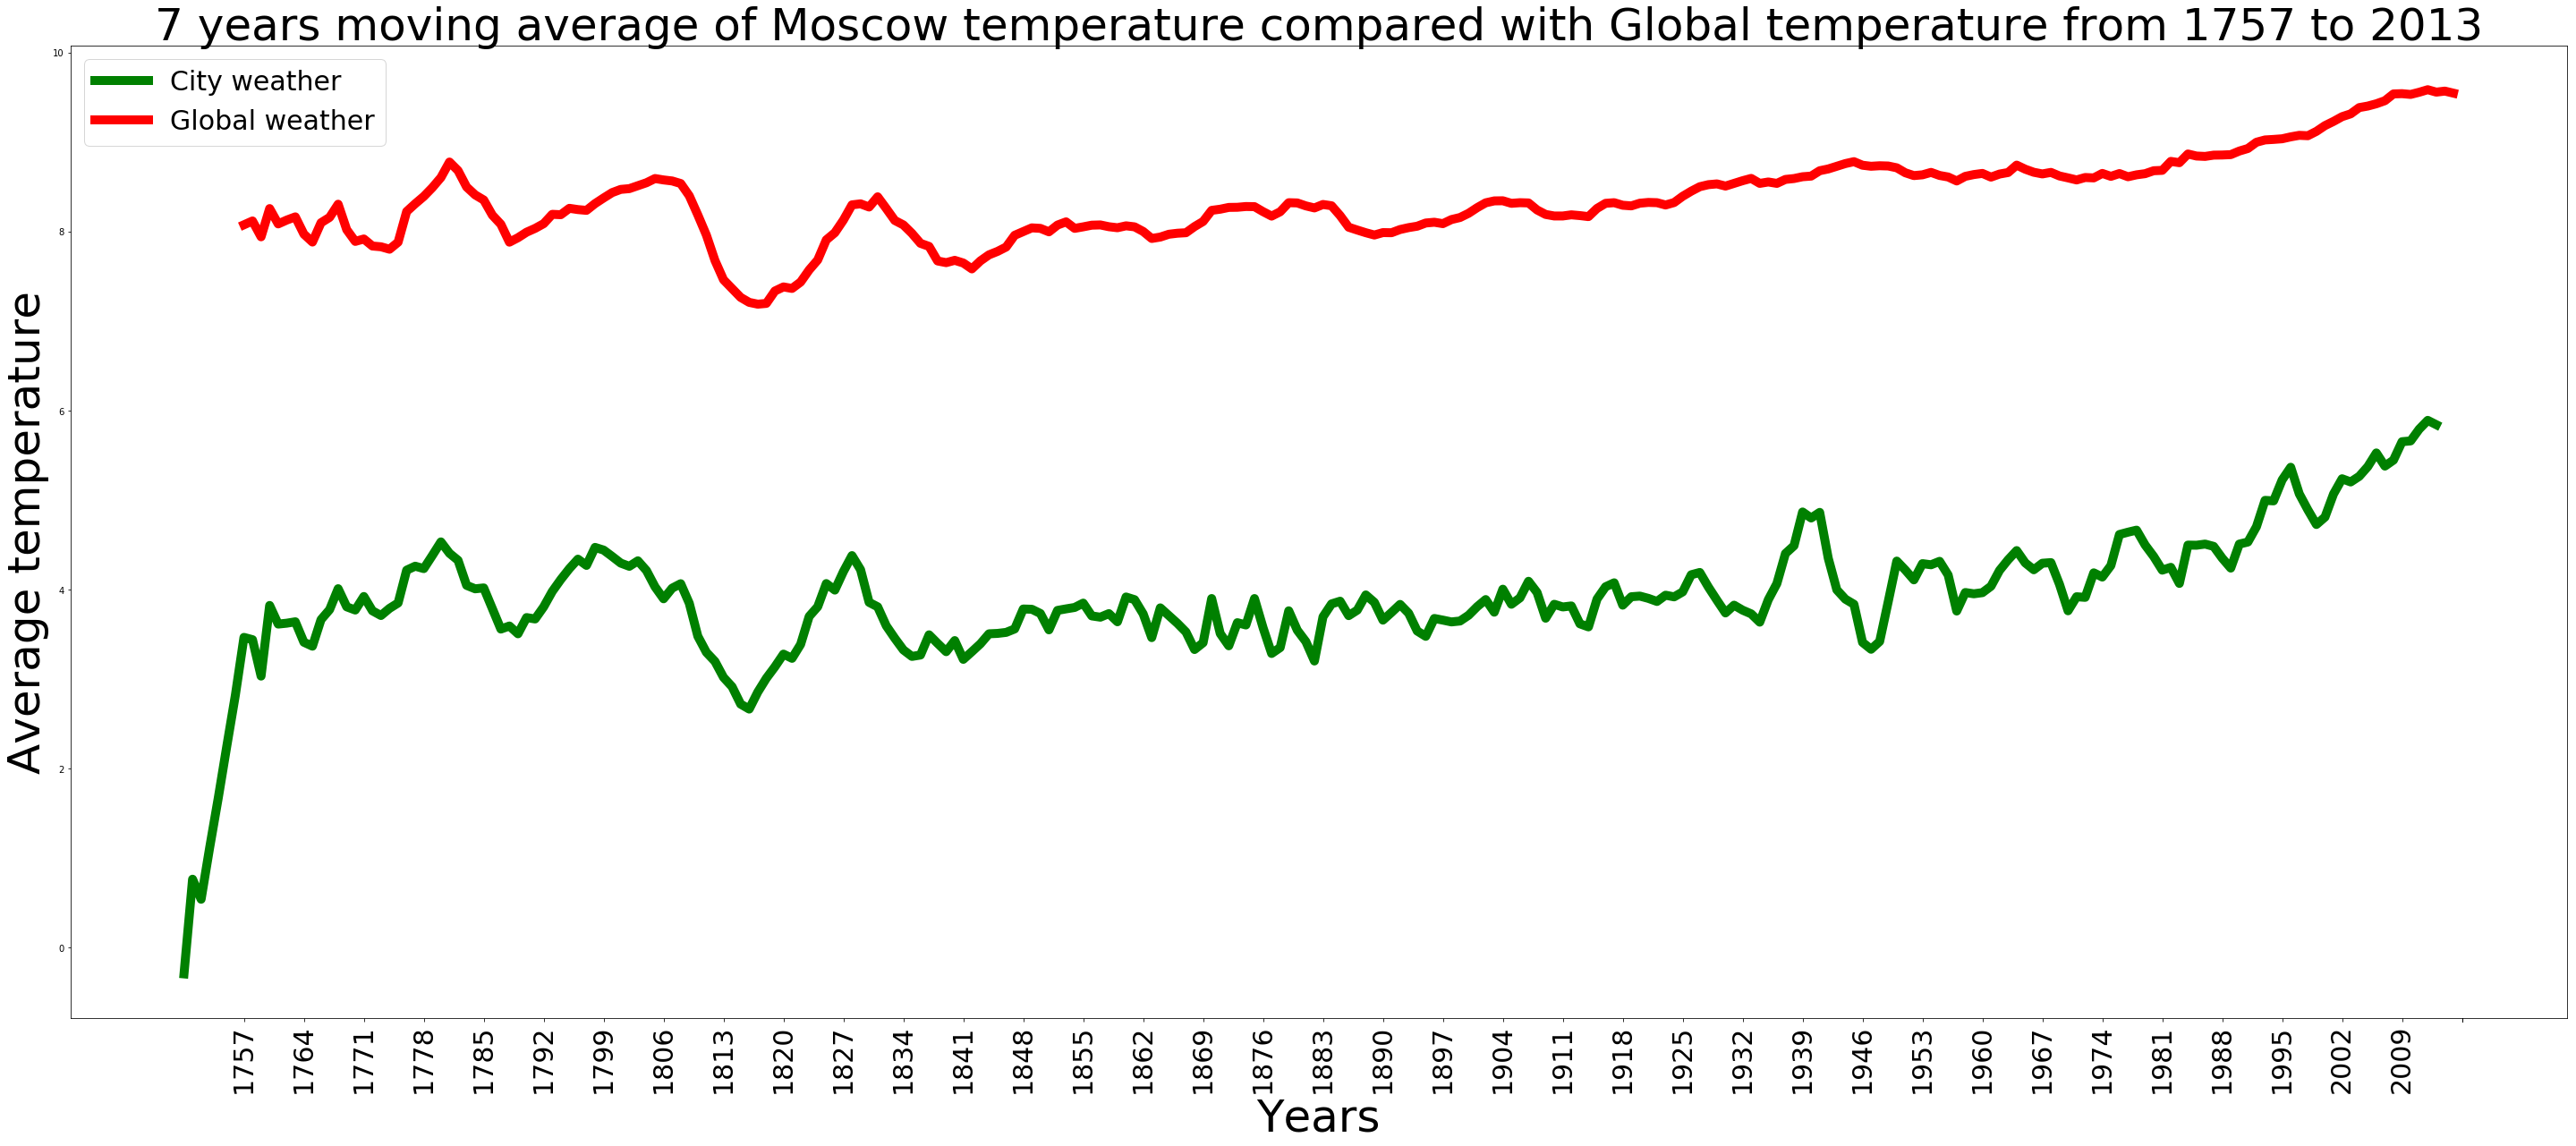

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (50,20))
plt.plot(labels_years_city, moving_avg_temps_city, color='g', linewidth=10, label = 'City weather')
plt.plot(labels_years_global, moving_avg_temps_global, color='r', linewidth=10, label = 'Global weather')
plt.xticks(years_global, years_global, rotation='vertical', fontsize=30)
plt.xlabel('Years', fontsize=50)
plt.ylabel('Average temperature', fontsize=50)
plt.title('7 years moving average of Moscow temperature compared with Global temperature from 1757 to 2013', fontsize=50)
plt.legend(loc=2, prop={'size': 30})
plt.show()

### 5. Observations.

- The weather in my city is colder compared to the global average
- In the 18th and 19th centuries the corellation is strong. But in 20th century the moving average in my city varies much more than the global average.
- In the 20th century the weather is gradually getting hotter 
- In the last few decades the weather in my city is getting hotter too fast